# 0.) Import the Credit Card Fraud Data From CCLE

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

In [13]:
df = pd.read_csv("~/Downloads/fraudTest.csv")

In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [15]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/5j/08vl_fjx6cj5ylf8zh9tkxyr0000gn/T/ipykernel_1923/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/5j/08vl_fjx6cj5ylf8zh9tkxyr0000gn/T/ipykernel_1923/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [18]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [21]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [24]:
over_log.score(X_test, y_test)

0.9306965138319058

In [25]:
under_log.score(X_test, y_test)

0.934883274550733

In [26]:
smote_log.score(X_test, y_test)

0.9303966026056287

In [27]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [28]:
# Sensitivity here in credit fraud is more important as seen from last class

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
y_true = y_test

In [31]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77365,  5695],
       [   82,   216]])

In [32]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7248322147651006


In [33]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77716,  5344],
       [   84,   214]])

In [34]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7181208053691275


In [35]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77340,  5720],
       [   82,   216]])

In [36]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7248322147651006


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [39]:
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([X_train, y_train.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])

In [40]:
raw_temp.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
0,-0.003606,-0.292550,1.127613,-0.279056,-0.275702,2.973709,-0.190104,-0.322941,-0.265986,-0.321911,-0.310027,-0.227634,-0.257730,-0.276123,-0.284878,-0.314059,-0.179755,0.0
1,-0.415602,-0.281095,0.261066,-0.279056,-0.275702,-0.336280,-0.190104,-0.322941,-0.265986,-0.321911,-0.310027,4.393021,-0.257730,-0.276123,-0.284878,-0.314059,-0.179755,0.0
2,-0.430471,-0.151570,1.300922,-0.279056,-0.275702,-0.336280,-0.190104,-0.322941,-0.265986,-0.321911,-0.310027,-0.227634,-0.257730,-0.276123,3.510274,-0.314059,-0.179755,0.0
3,0.785316,-0.277865,-0.547711,-0.279056,-0.275702,-0.336280,-0.190104,-0.322941,-0.265986,3.106450,-0.310027,-0.227634,-0.257730,-0.276123,-0.284878,-0.314059,-0.179755,0.0
4,-0.175381,-0.287128,0.376606,-0.279056,-0.275702,-0.336280,-0.190104,-0.322941,-0.265986,-0.321911,-0.310027,-0.227634,3.880026,-0.276123,-0.284878,-0.314059,-0.179755,0.0


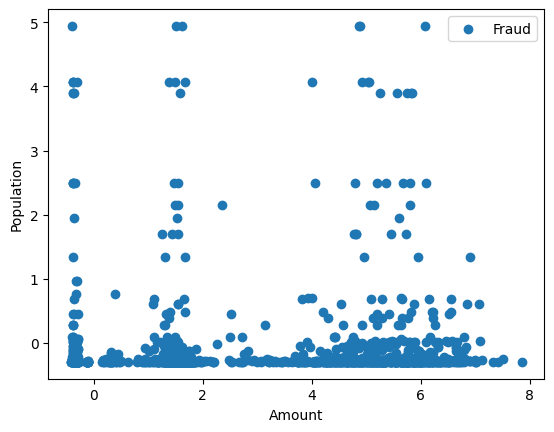

In [41]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [42]:
#raw_temp = pd.concat([smote_X, smote_y], axis =1)
# Concatenate features and target variable along with column names
feature_names = X.columns.tolist()  
raw_temp_with_names = np.concatenate([smote_X, smote_y.to_numpy().reshape(-1, 1)], axis=1)

# Create a DataFrame with column names
raw_temp = pd.DataFrame(raw_temp_with_names, columns=feature_names + ['is_fraud'])


/Users/kanupriya1190/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


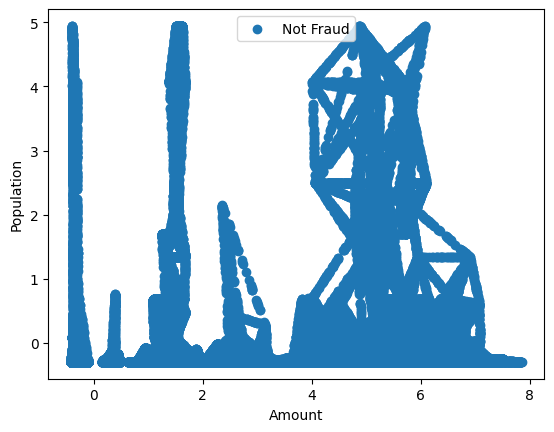

In [43]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [45]:
resampling_methods = {"over":RandomOverSampler(), "under":RandomUnderSampler(), "smote":SMOTE()}
model_configs = {"LOG":LogisticRegression(), "LASSO":LogisticRegression(penalty="l1", C= 2., solver="liblinear"), "DTREE":DecisionTreeClassifier()}

In [46]:
def calc_perform_metrics(y_true,y_pred):
    tp,tn,fp,fn = confusion_matrix(y_true,y_pred).ravel()
    sensitivity= tp / (tp+fn)
    specificity= tn / (tn+fp)
    precision= precision_score(y_true,y_pred)
    recall= recall_score(y_true,y_pred)
    f1= f1_score(y_true,y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [47]:
trained_models = {}
results = []

In [48]:
for resample_keys, resampler in resampling_methods.items():
    resample_x, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key =f"{resample_keys}_{model_key}"
        m = model.fit(resample_x, resample_y)
        trained_models[combined_key] = m
        y_pred = m.predict(X_test)
        sensitivity, specificity, precision, recall, f1=calc_perform_metrics(y_true,y_pred)
        results.append({"Model": combined_key, "Sensitivity": sensitivity, "Specificity" : specificity, "Precision": precision, "Recall": recall, "F1": f1 })

In [49]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'over_DTREE': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'under_DTREE': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=2.0, penalty='l1', solver='liblinear'),
 'smote_DTREE': DecisionTreeClassifier()}

In [50]:
result_dt = pd.DataFrame(results)

In [51]:
result_dt.head(100)

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.997221,0.985435,0.037474,0.724832,0.071264
1,over_LASSO,0.997221,0.985425,0.037500,0.724832,0.071311
2,over_DTREE,0.998039,0.464286,0.582143,0.546980,0.564014
3,under_LOG,0.997251,0.987364,0.029636,0.704698,0.056880
4,under_LASSO,0.997251,0.987393,0.029569,0.704698,0.056757
5,under_DTREE,0.996493,0.995210,0.059698,0.929530,0.112191
6,smote_LOG,0.997217,0.985702,0.036804,0.724832,0.070050
7,smote_LASSO,0.997217,0.985692,0.036829,0.724832,0.070096
8,smote_DTREE,0.997412,0.872534,0.271229,0.718121,0.393744


In [52]:
#testing on holdout data
y_true1 = y_holdout
y_pred1 = over_log.predict(X_holdout)
calc_perform_metrics(y_true1,y_pred1)

(0.9968125742012078,
 0.9855097170132969,
 0.04097544790975448,
 0.7439759036144579,
 0.07767295597484276)

In [53]:
trained_models1 = {}
results1 = []

In [54]:
for resample_keys, resampler in resampling_methods.items():
    resample_x, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key =f"{resample_keys}_{model_key}"
        m = model.fit(resample_x, resample_y)
        trained_models[combined_key] = m
        y_pred1 = m.predict(X_holdout)
        sensitivity, specificity, precision, recall, f1=calc_perform_metrics(y_true1,y_pred1)
        results1.append({"Model": combined_key, "Sensitivity": sensitivity, "Specificity" : specificity, "Precision": precision, "Recall": recall, "F1": f1 })

In [55]:
trained_models1

{}

In [56]:
result_dt1 = pd.DataFrame(results1)
result_dt1

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.996834,0.984814,0.042246,0.740964,0.079935
1,over_LASSO,0.996834,0.984816,0.042239,0.740964,0.079922
2,over_DTREE,0.997738,0.454545,0.610390,0.566265,0.587500
3,under_LOG,0.996795,0.985977,0.040299,0.746988,0.076472
4,under_LASSO,0.996794,0.986026,0.040162,0.746988,0.076226
5,under_DTREE,0.996073,0.995077,0.062324,0.930723,0.116824
6,smote_LOG,0.996812,0.985574,0.040799,0.743976,0.077357
7,smote_LASSO,0.996812,0.985569,0.040813,0.743976,0.077381
8,smote_DTREE,0.997001,0.873112,0.300242,0.746988,0.428325


Answer) 

1)The models with the highest Sensitivity but lowest Precision are over_LOG, over_LASSO, under_LOG, under_LASSO, smote_LOG, and smote_LASSO. This suggests that while they are excellent at detecting positive occurrences, they also mistakenly label a large number of negatives as positives. 
2) The over_DTREE model labels nearly all samples as positive, regardless of their true label.
3) In comparison to the other models, the under_DTREE model has a far higher F1 score and better balance. 
4) The Precision and Recall values of the smote_DTREE model are reasonable, suggesting a balance between properly categorizing negative occurrences and recognizing positive examples.

Based on the test data, the under_DTREE model is the best model overall. It has a comparatively higher F1 score, indicating a good balance between precision and recall, and a good balance between sensitivity and specificity. When it comes to unseen data, this model will outperform the others.

In [ ]:
s